In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('Customers.csv')

df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


C:\Users\user\AppData\Local\Temp\ipykernel_16576\1698501582.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['profession'].fillna(profession_mode, inplace=True)


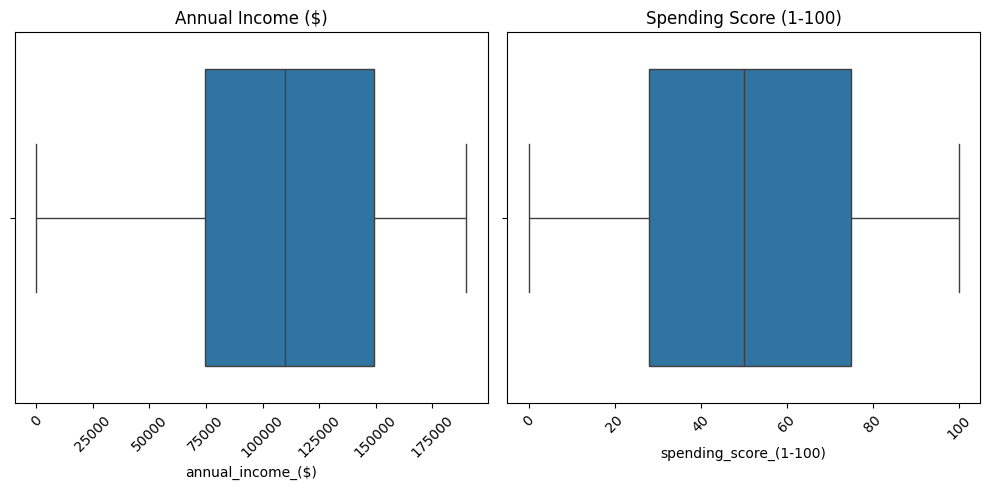

In [3]:
profession_mode = df['profession'].mode().iloc[0]
df['profession'].fillna(profession_mode, inplace=True)
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.lower().str.replace(' ', '_')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='annual_income_($)')
plt.title('Annual Income ($)')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='spending_score_(1-100)')
plt.title('Spending Score (1-100)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



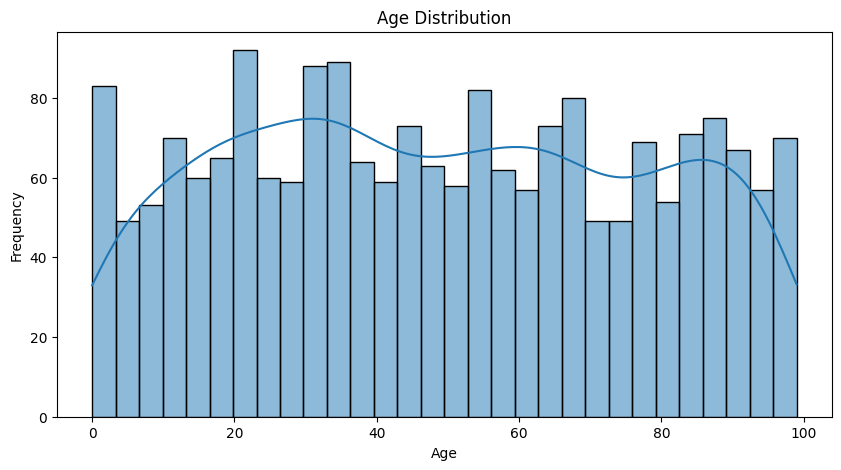

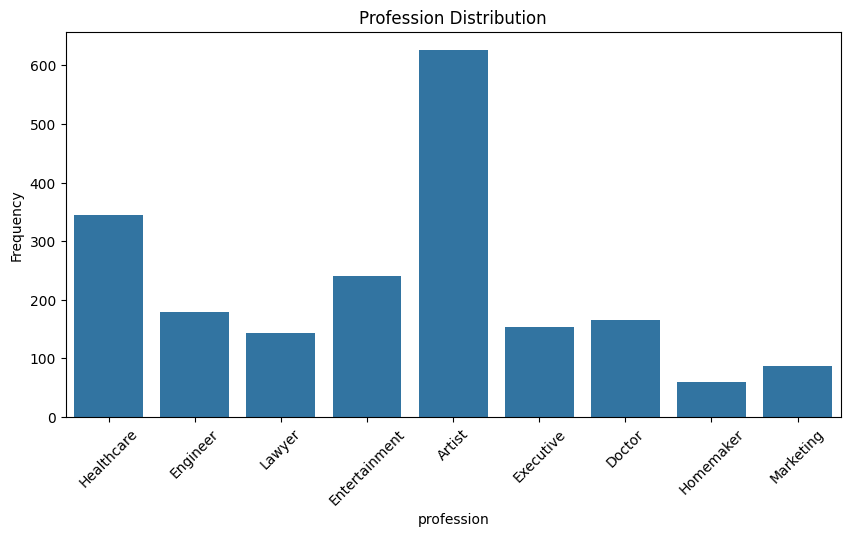

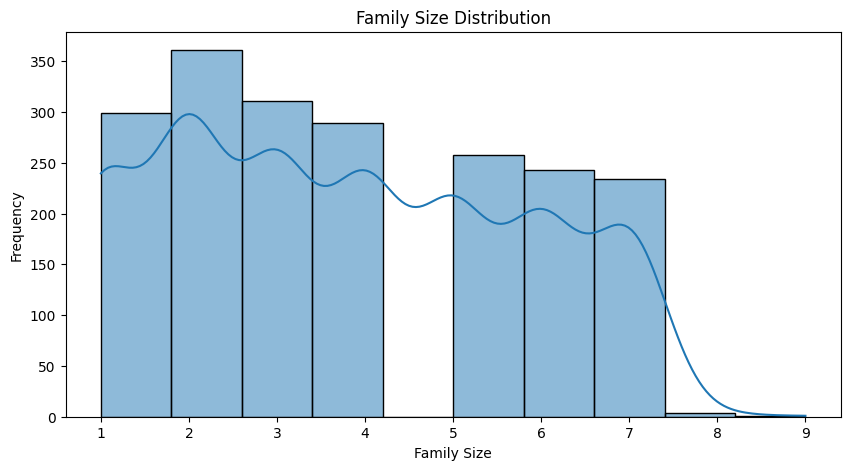

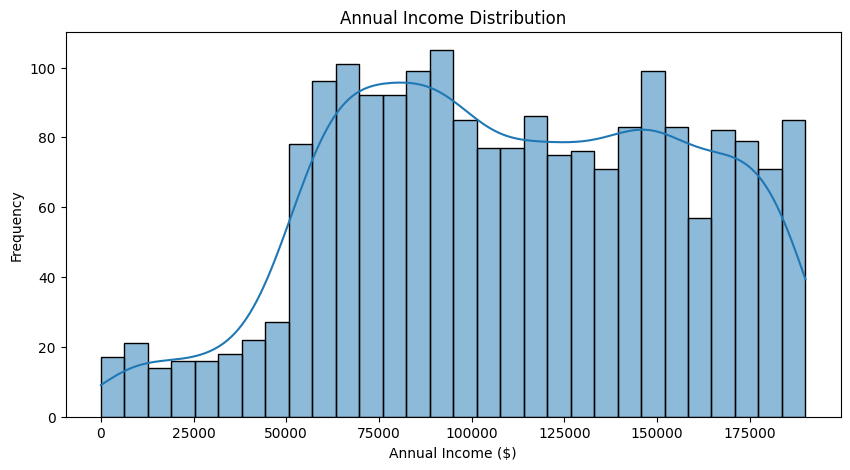

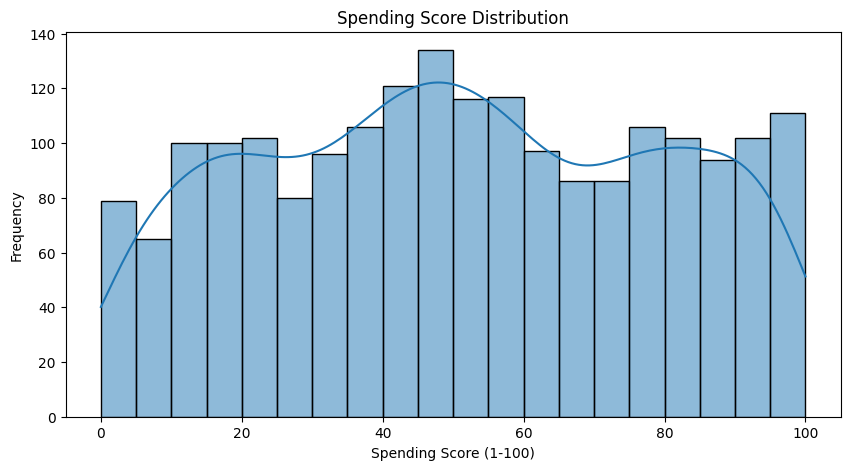

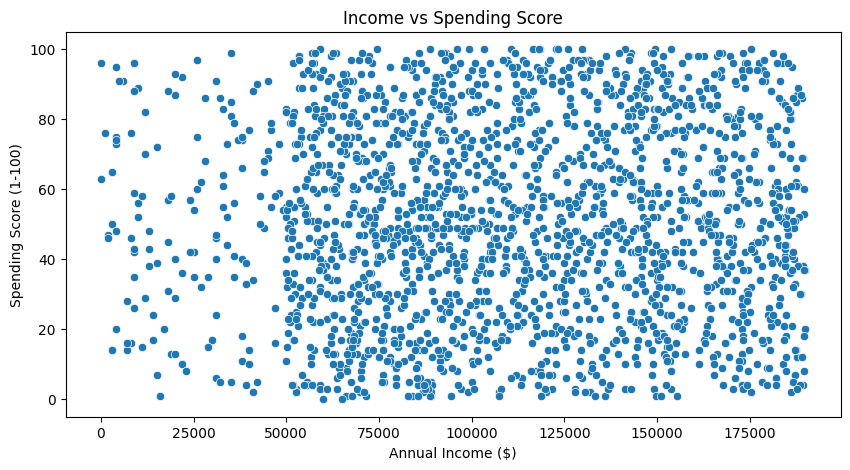

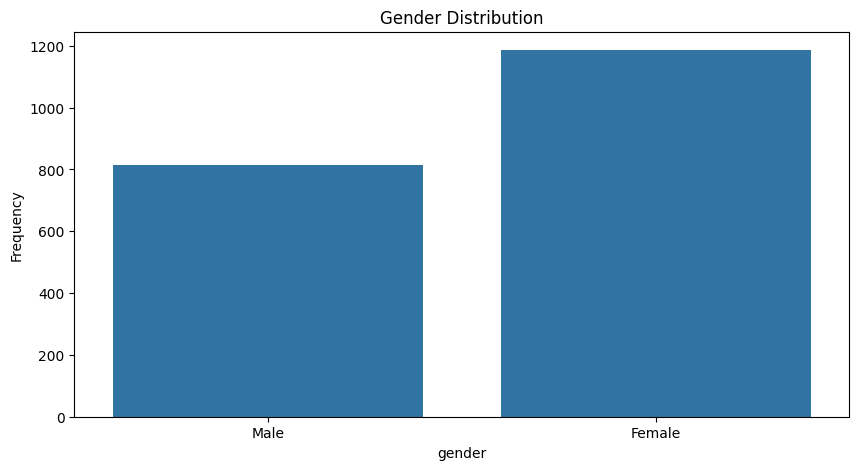

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='profession')
plt.title('Profession Distribution')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df, x='family_size', bins=10, kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df, x='annual_income_($)', bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df, x='spending_score_(1-100)', bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='annual_income_($)', y='spending_score_(1-100)')
plt.title('Income vs Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.ylabel('Frequency')
plt.show()



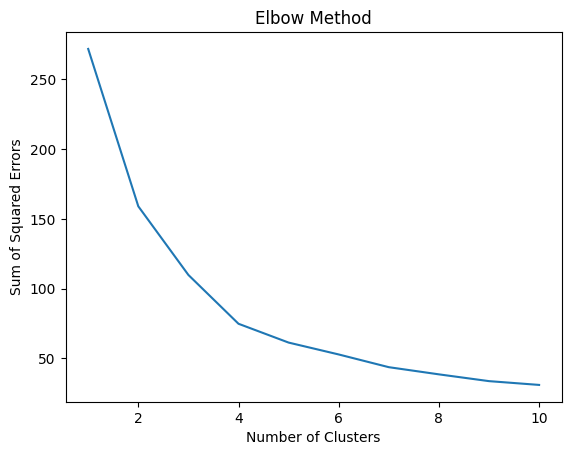

   customerid  gender  age  annual_income_($)  spending_score_(1-100)  \
0           1    Male   19           0.078958                    0.39   
1           2    Male   21           0.184236                    0.81   
2           3  Female   20           0.452694                    0.06   
3           4  Female   23           0.310569                    0.77   
4           5  Female   31           0.200027                    0.40   

      profession  work_experience  family_size  cluster  
0     Healthcare                1            4        2  
1       Engineer                3            3        4  
2       Engineer                1            1        1  
3         Lawyer                0            2        4  
4  Entertainment                2            6        2  


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['annual_income_($)', 'spending_score_(1-100)']] = scaler.fit_transform(df[['annual_income_($)', 'spending_score_(1-100)']])

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['annual_income_($)', 'spending_score_(1-100)']])
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['annual_income_($)', 'spending_score_(1-100)']])
df['cluster'] = kmeans.labels_

print(df.head())





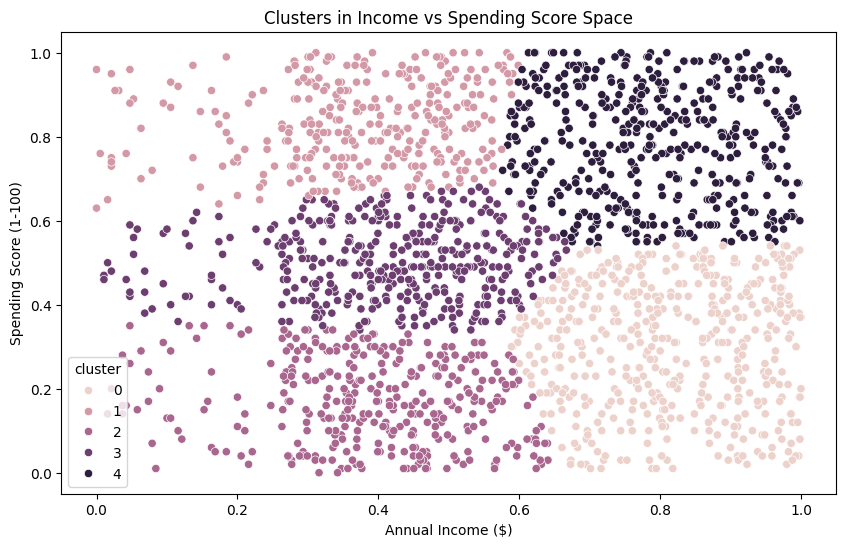

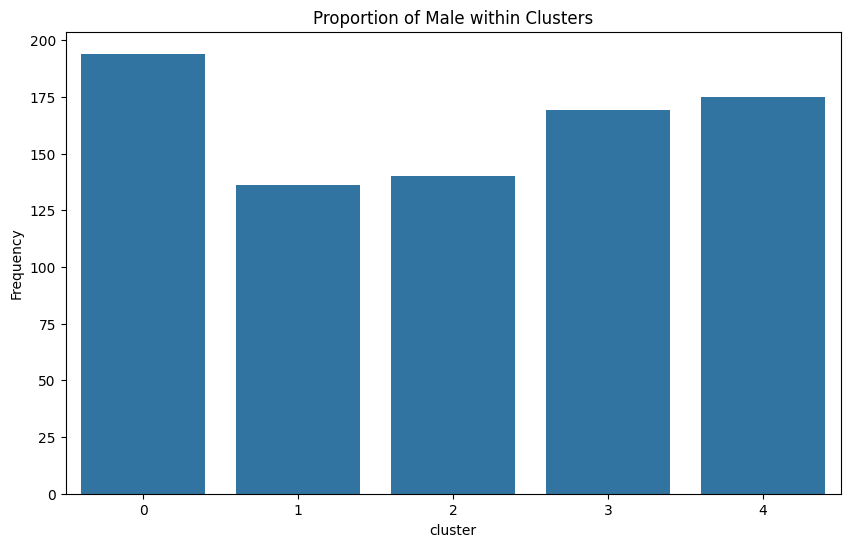

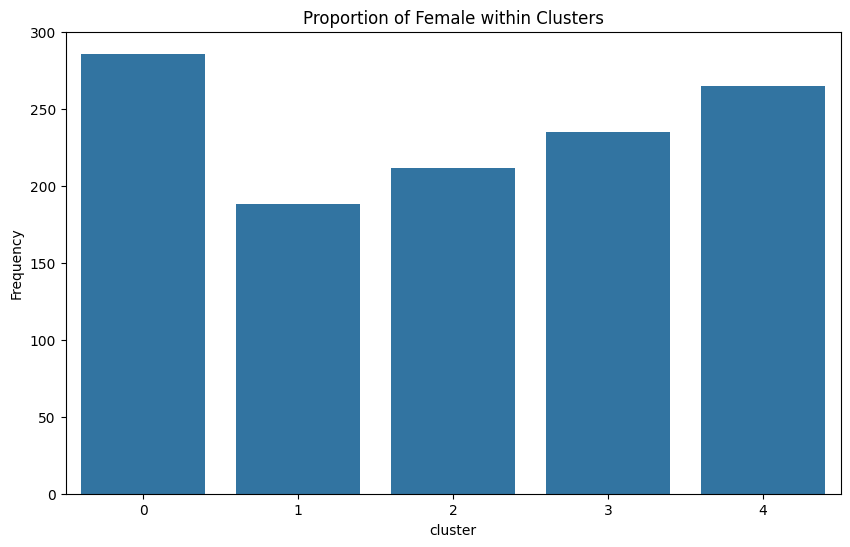

   cluster  annual_income_($)  spending_score_(1-100)        age
0        0           0.815009                0.299437  50.147917
1        1           0.374604                0.830833  45.712963
2        2           0.391791                0.168920  49.656250
3        3           0.414920                0.501757  50.764851
4        4           0.790099                0.782182  47.840909
gender   Female  Male
cluster              
0           286   194
1           188   136
2           212   140
3           235   169
4           265   175
profession  Artist  Doctor  Engineer  Entertainment  Executive  Healthcare  \
cluster                                                                      
0              144      35        45             49         41          88   
1              112      28        21             43         22          58   
2              108      25        38             39         28          62   
3              130      33        37             54         28    

In [12]:
cluster_characteristics = df.groupby('cluster').agg({
    'annual_income_($)': 'mean',
    'spending_score_(1-100)': 'mean',
    'age': 'mean'
}).reset_index()

gender_distribution = df.groupby('cluster')['gender'].value_counts().unstack().fillna(0)
profession_distribution = df.groupby('cluster')['profession'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_income_($)', y='spending_score_(1-100)', hue='cluster')
plt.title('Clusters in Income vs Spending Score Space')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_distribution, x=gender_distribution.index, y='Male')
plt.title('Proportion of Male within Clusters')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_distribution, x=gender_distribution.index, y='Female')
plt.title('Proportion of Female within Clusters')
plt.ylabel('Frequency')
plt.show()

print(cluster_characteristics)
print(gender_distribution)
print(profession_distribution)





        annual_income_($)                                                    \
                    count      mean       std       min       25%       50%   
cluster                                                                       
0                   480.0  0.815009  0.113457  0.588875  0.717228  0.810240   
1                   324.0  0.374604  0.135712  0.000000  0.303098  0.379976   
2                   352.0  0.391791  0.139004  0.015792  0.310916  0.400055   
3                   404.0  0.414920  0.142691  0.010528  0.329616  0.431638   
4                   440.0  0.790099  0.114093  0.576495  0.699635  0.784139   

                            spending_score_(1-100)            ...              \
              75%       max                  count      mean  ...   75%   max   
cluster                                                       ...               
0        0.910956  1.000000                  480.0  0.299438  ...  0.42  0.54   
1        0.482881  0.598540                

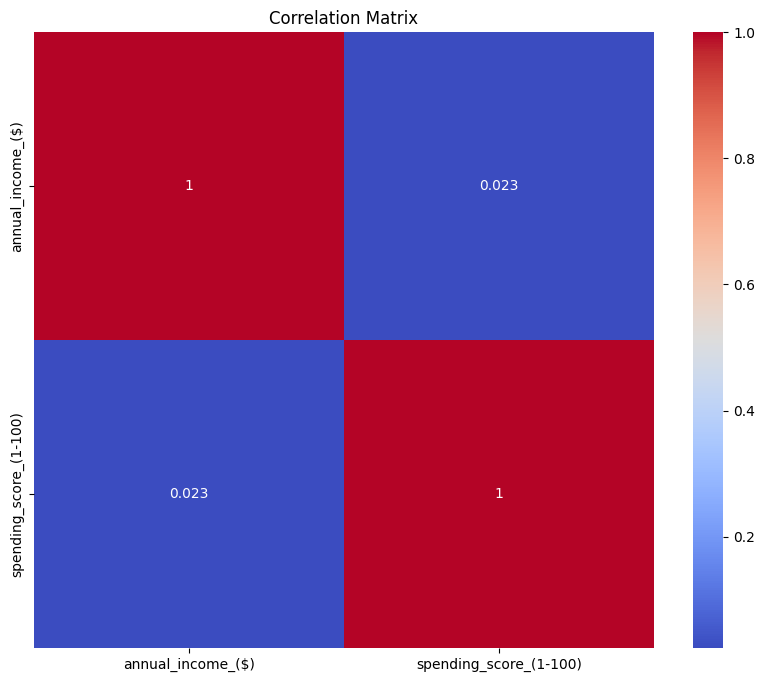

Feature: 0, Score: 0.26872
Feature: 1, Score: 0.39346


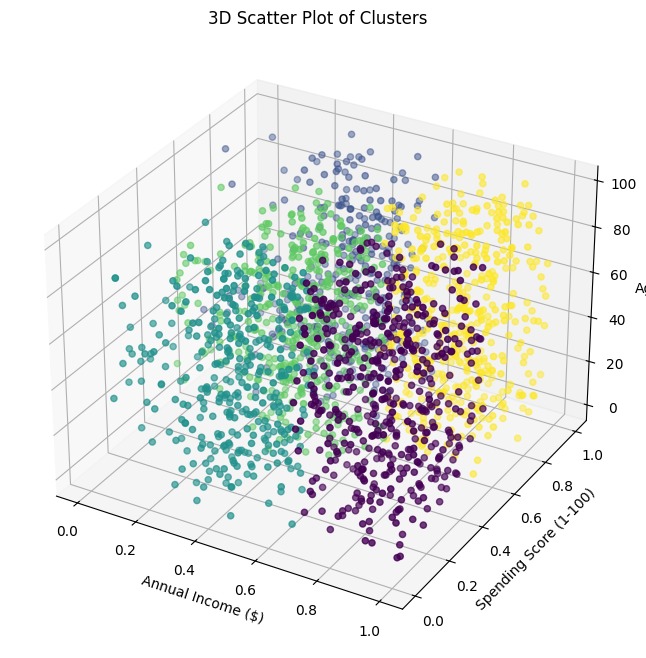

        VIF                features
0  3.987405       annual_income_($)
1  3.212296  spending_score_(1-100)
2  3.045398                     age


In [19]:
cluster_demographics = df.groupby('cluster')[['gender', 'profession', 'annual_income_($)', 'spending_score_(1-100)', 'family_size']].describe()
print(cluster_demographics)

from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette = silhouette_score(df[['annual_income_($)', 'spending_score_(1-100)']], df['cluster'])
davies_bouldin = davies_bouldin_score(df[['annual_income_($)', 'spending_score_(1-100)']], df['cluster'])
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

correlation_matrix = df[['annual_income_($)', 'spending_score_(1-100)']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

from sklearn.inspection import permutation_importance
result = permutation_importance(kmeans, df[['annual_income_($)', 'spending_score_(1-100)']], df['cluster'], n_repeats=10, random_state=42)
importance = result.importances_mean
for v in range(len(importance)):
    print('Feature: %0d, Score: %.5f' % (v, importance[v]))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['annual_income_($)'], df['spending_score_(1-100)'], df['age'], c=df['cluster'])
ax.set_xlabel('Annual Income ($)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.title('3D Scatter Plot of Clusters')
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df[['annual_income_($)', 'spending_score_(1-100)', 'age']].values, i) for i in range(df[['annual_income_($)', 'spending_score_(1-100)', 'age']].shape[1])]
vif["features"] = df[['annual_income_($)', 'spending_score_(1-100)', 'age']].columns
print(vif)







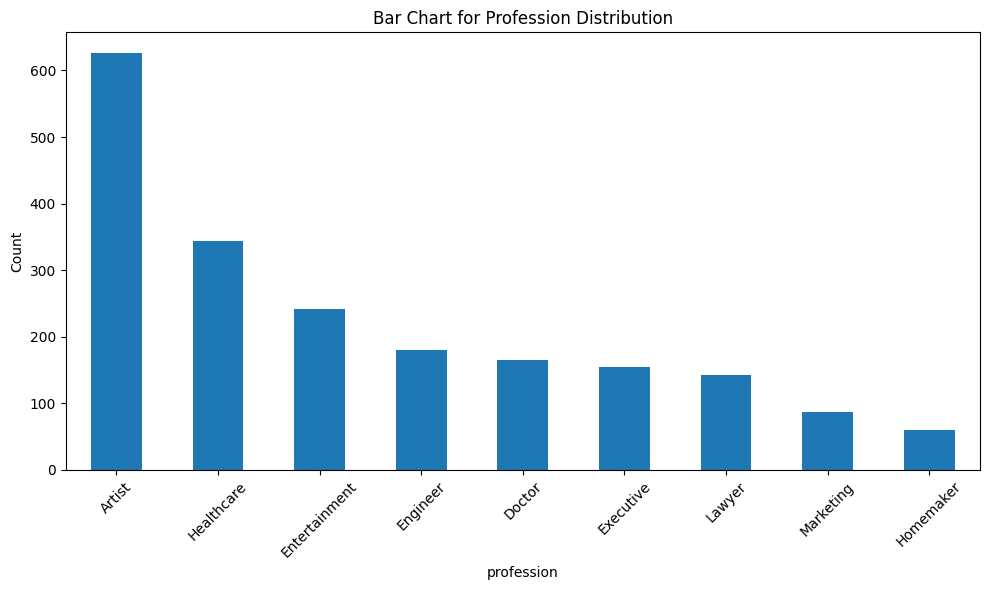

In [26]:
import matplotlib.pyplot as plt

profession_counts = df['profession'].value_counts()

plt.figure(figsize=(10, 6))
profession_counts.plot(kind='bar')
plt.title('Bar Chart for Profession Distribution')
plt.xlabel('profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




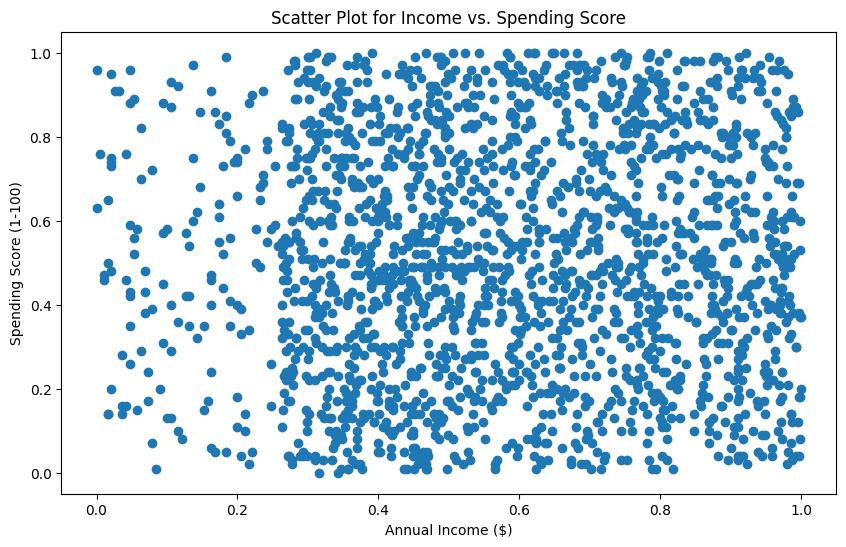

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_income_($)'], df['spending_score_(1-100)'])
plt.title('Scatter Plot for Income vs. Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()




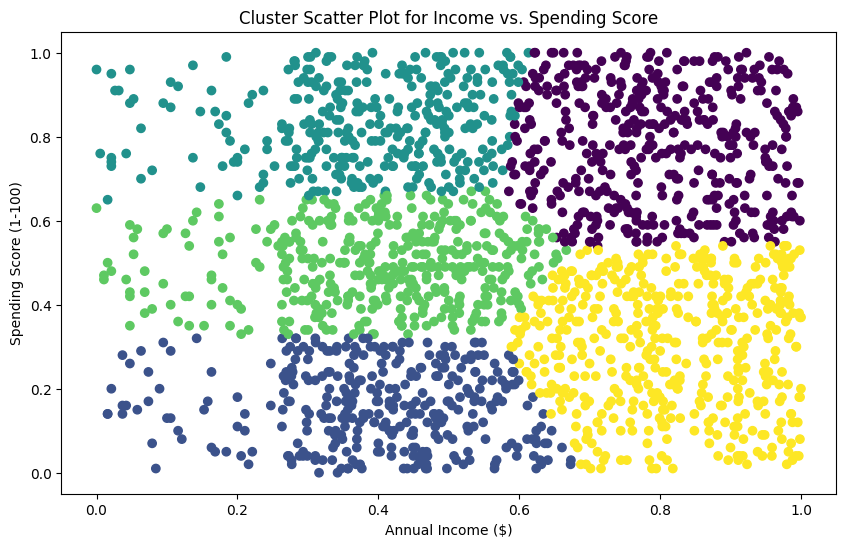

In [30]:

from sklearn.cluster import KMeans

X = df[['annual_income_($)', 'spending_score_(1-100)']]

kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

df['cluster'] = kmeans.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['annual_income_($)'], df['spending_score_(1-100)'], c=df['cluster'], cmap='viridis')
plt.title('Cluster Scatter Plot for Income vs. Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()


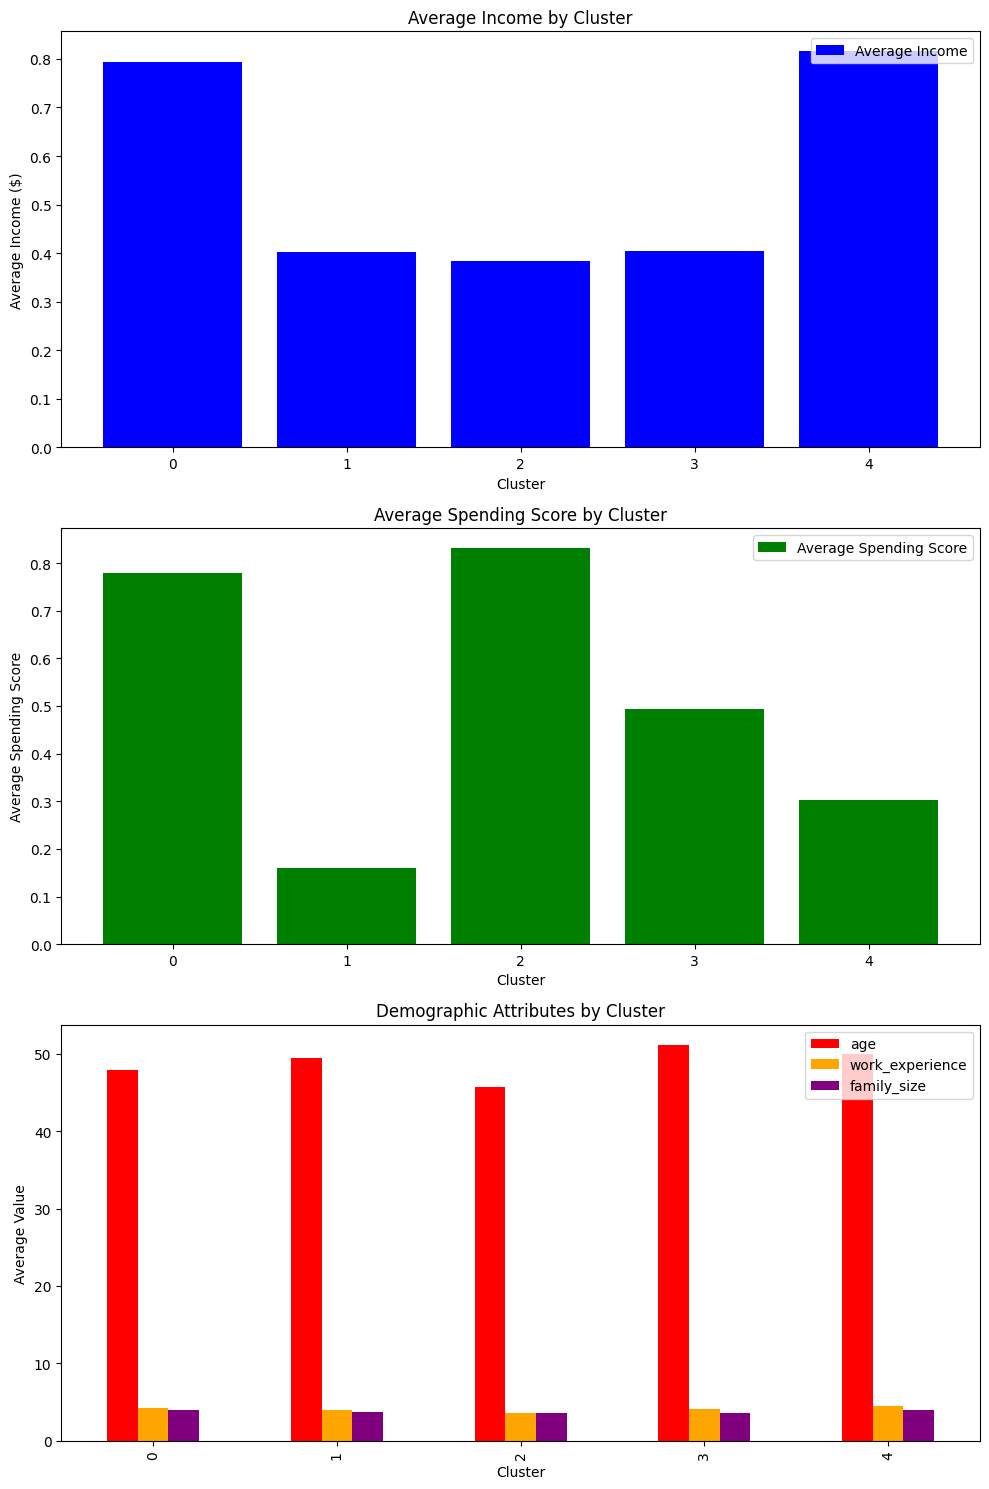

In [34]:
# Bar Charts to compare average income, spending scores, or other demographic attributes across clusters
fig, axs = plt.subplots(3, figsize=(10, 15))

# Average Income by Cluster
average_income_by_cluster = df.groupby('cluster')['annual_income_($)'].mean()
axs[0].bar(average_income_by_cluster.index, average_income_by_cluster.values, color='blue')
axs[0].set_title('Average Income by Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Average Income ($)')
axs[0].legend(['Average Income'], loc='upper right')

# Average Spending Score by Cluster
average_spending_score_by_cluster = df.groupby('cluster')['spending_score_(1-100)'].mean()
axs[1].bar(average_spending_score_by_cluster.index, average_spending_score_by_cluster.values, color='green')
axs[1].set_title('Average Spending Score by Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Average Spending Score')
axs[1].legend(['Average Spending Score'], loc='upper right')

# Demographic Attributes by Cluster
demographic_attributes = ['age', 'work_experience', 'family_size']
demographic_data = df.groupby('cluster')[demographic_attributes].mean()
demographic_data.plot(kind='bar', ax=axs[2], color=['red', 'orange', 'purple'])
axs[2].set_title('Demographic Attributes by Cluster')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Average Value')
axs[2].legend(demographic_attributes, loc='upper right')

plt.tight_layout()
plt.show()




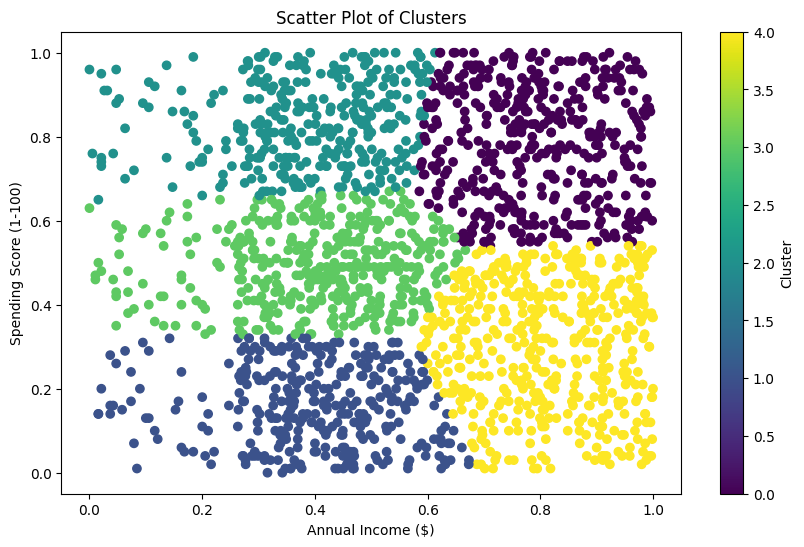

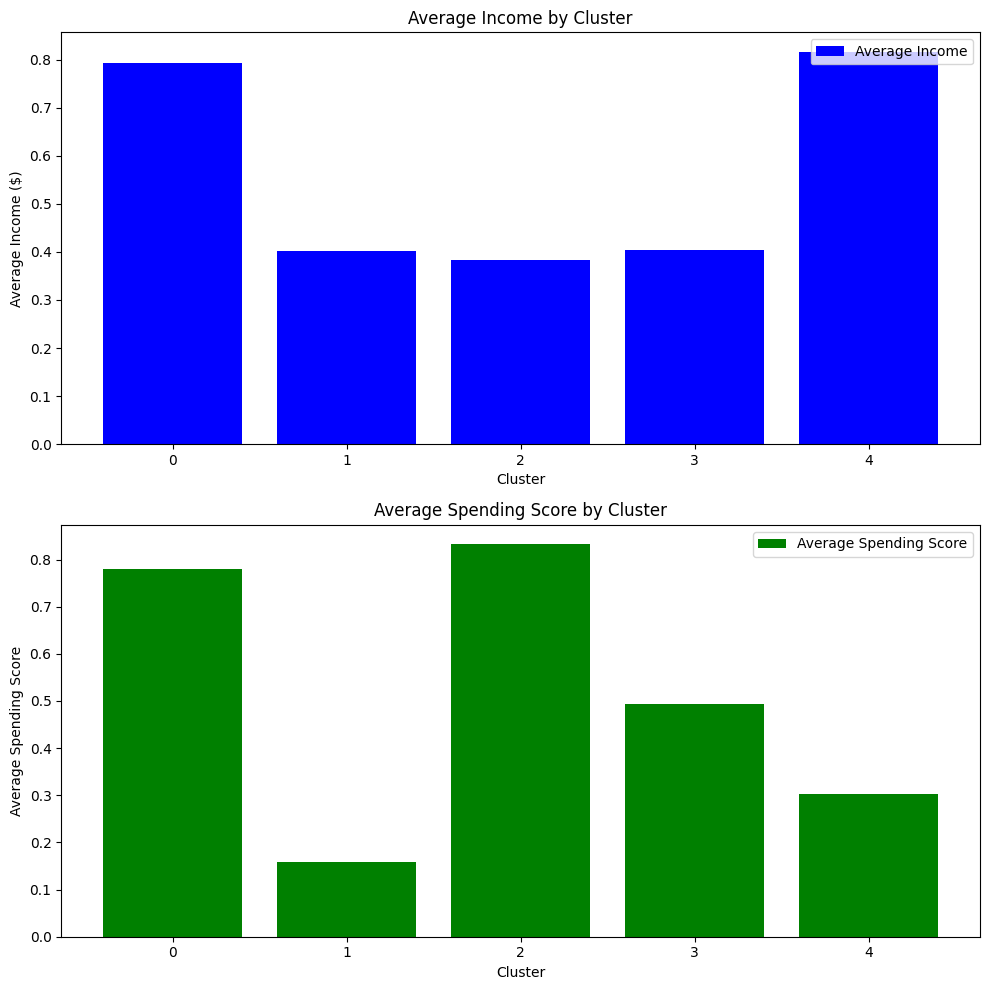

In [35]:
# Scatter Plot of Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_income_($)'], df['spending_score_(1-100)'], c=df['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Bar Chart Comparing Cluster Metrics
fig, axs = plt.subplots(2, figsize=(10, 10))

# Average Income by Cluster
average_income_by_cluster = df.groupby('cluster')['annual_income_($)'].mean()
axs[0].bar(average_income_by_cluster.index, average_income_by_cluster.values, color='blue')
axs[0].set_title('Average Income by Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Average Income ($)')
axs[0].legend(['Average Income'], loc='upper right')

# Average Spending Score by Cluster
average_spending_score_by_cluster = df.groupby('cluster')['spending_score_(1-100)'].mean()
axs[1].bar(average_spending_score_by_cluster.index, average_spending_score_by_cluster.values, color='green')
axs[1].set_title('Average Spending Score by Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Average Spending Score')
axs[1].legend(['Average Spending Score'], loc='upper right')

plt.tight_layout()
plt.show()


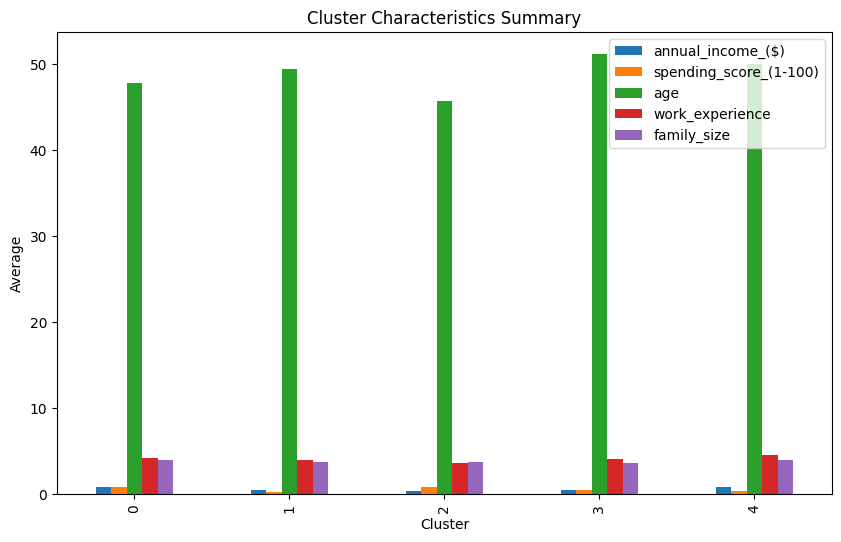

In [38]:
# Cluster Characteristics Summary Chart
cluster_summary = df.groupby('cluster').agg({'annual_income_($)': 'mean', 'spending_score_(1-100)': 'mean', 'age': 'mean', 'work_experience': 'mean', 'family_size': 'mean'})
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Characteristics Summary')
plt.xlabel('Cluster')
plt.ylabel('Average')
plt.show()



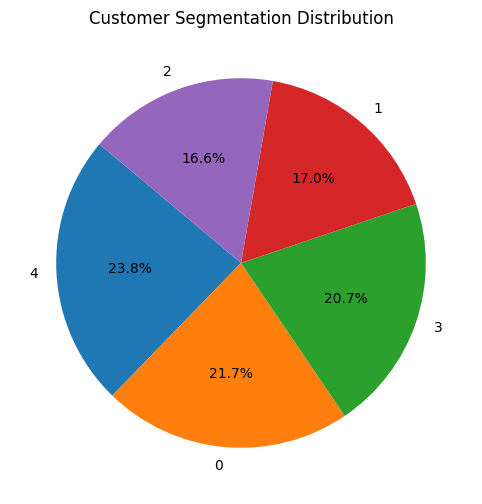

In [39]:
# Pie Chart for Customer Segmentation
plt.figure(figsize=(10, 6))
customer_segmentation = df['cluster'].value_counts(normalize=True) * 100
plt.pie(customer_segmentation, labels=customer_segmentation.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segmentation Distribution')
plt.show()
